### UCF101 Dataset
Author : @leopauly | cnlp@leeds.ac.uk <br>
Description : Preparing and checking UCF101 dataset functions

In [1]:
## Imports
from keras.layers.convolutional import Convolution3D, MaxPooling3D, ZeroPadding3D
from keras.layers.core import Dense, Dropout, Flatten
from keras.models import Sequential
import random
import numpy as np
from PIL import Image
from os import listdir
from scipy.ndimage import imread
import cv2 

# Custom scripts
import lscript as lsp
import modelling as md
#from DataSet.DataSet import DataSet
import dataset as dset
import ucf101_dataset as ucf

Using TensorFlow backend.


In [2]:
height=112 
width=112 
channel=3
nb_class=3
cluster_length=8
batch_size=16
#strides=1
#total_frames_in_seq=16
#time_step=16
#num_clusters= int( (total_frames_in_seq-cluster_length) / strides) + 1
#feature_size=8192   #16384  #487

#### Dataset : Shuffle

In [3]:
train_images, train_labels, next_batch_start, _ = ucf. read_vid_and_label('UCF101_data_preparation/train.list',10,-1,16,112,normalisation=True)

Loading /nobackup/leopauly/UCF101/UCF-101/PlayingSitar/v_PlayingSitar_g07_c03...
Loading /nobackup/leopauly/UCF101/UCF-101/PlayingCello/v_PlayingCello_g23_c03...
Loading /nobackup/leopauly/UCF101/UCF-101/FrisbeeCatch/v_FrisbeeCatch_g06_c04...
Loading /nobackup/leopauly/UCF101/UCF-101/SoccerPenalty/v_SoccerPenalty_g07_c02...
Loading /nobackup/leopauly/UCF101/UCF-101/SalsaSpin/v_SalsaSpin_g19_c01...
Loading /nobackup/leopauly/UCF101/UCF-101/TrampolineJumping/v_TrampolineJumping_g19_c02...
Loading /nobackup/leopauly/UCF101/UCF-101/BaseballPitch/v_BaseballPitch_g25_c06...
Loading /nobackup/leopauly/UCF101/UCF-101/Skiing/v_Skiing_g01_c01...
Loading /nobackup/leopauly/UCF101/UCF-101/SumoWrestling/v_SumoWrestling_g08_c07...
Loading /nobackup/leopauly/UCF101/UCF-101/BabyCrawling/v_BabyCrawling_g22_c01...
Loading /nobackup/leopauly/UCF101/UCF-101/CleanAndJerk/v_CleanAndJerk_g16_c02...
Loading /nobackup/leopauly/UCF101/UCF-101/HighJump/v_HighJump_g03_c03...
(10, 16, 112, 112, 3)


In [4]:
print(train_images.shape)
print(train_labels.shape)
print('labels',train_labels)
print(next_batch_start)

(10, 16, 112, 112, 3)
(10,)
labels [64 58 30 84 76 93 80 86 20 39]
2519


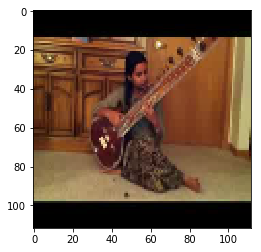

In [5]:
img_temp=train_images[0][0]
lsp.view_image(img_temp)

In [17]:
item_num=3

label:24
Video_seq shape: (10, 16, 112, 112, 3) Label shape (10,)


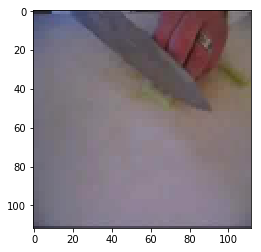

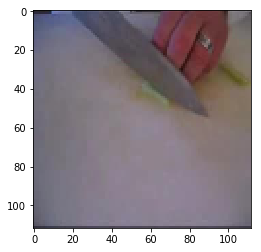

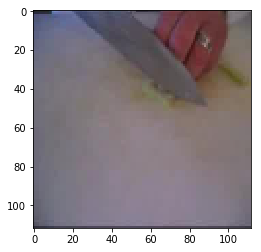

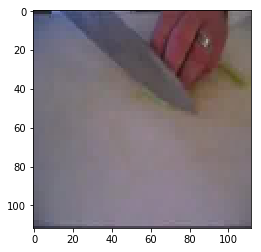

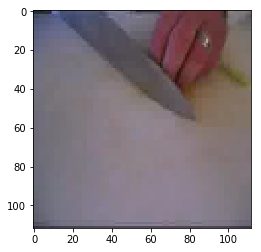

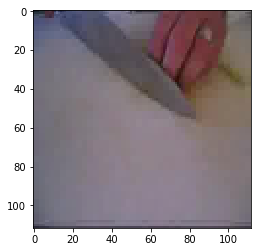

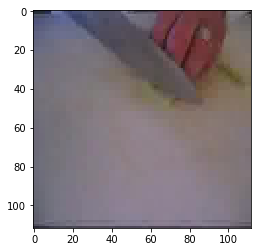

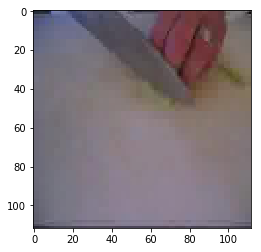

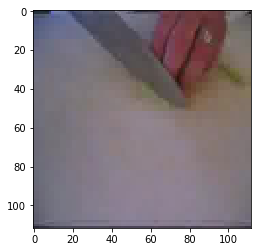

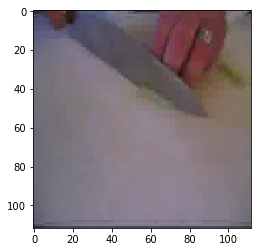

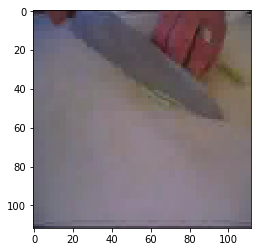

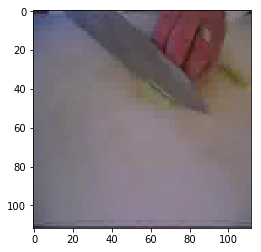

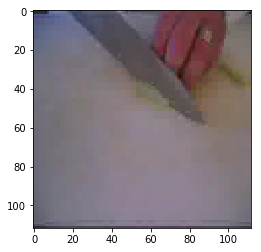

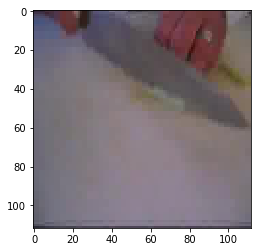

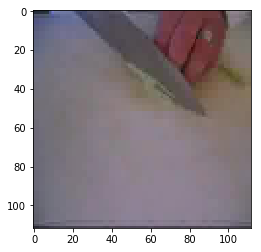

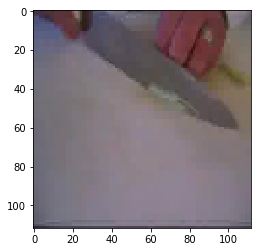

In [18]:
lsp.view_video_seq(train_images,train_labels,16,item_num)

In [8]:
print(train_images[0][0])


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ..., 
 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


#### Dataset : With next batch Indicator ( returns video frames sequentially )

Loading /nobackup/leopauly/UCF101/UCF-101/CuttingInKitchen/v_CuttingInKitchen_g23_c02...
Loading /nobackup/leopauly/UCF101/UCF-101/CuttingInKitchen/v_CuttingInKitchen_g23_c04...
Loading /nobackup/leopauly/UCF101/UCF-101/CuttingInKitchen/v_CuttingInKitchen_g24_c01...
Loading /nobackup/leopauly/UCF101/UCF-101/CuttingInKitchen/v_CuttingInKitchen_g24_c02...
Loading /nobackup/leopauly/UCF101/UCF-101/CuttingInKitchen/v_CuttingInKitchen_g24_c04...
Loading /nobackup/leopauly/UCF101/UCF-101/CuttingInKitchen/v_CuttingInKitchen_g25_c01...
Loading /nobackup/leopauly/UCF101/UCF-101/CuttingInKitchen/v_CuttingInKitchen_g25_c02...
Loading /nobackup/leopauly/UCF101/UCF-101/CuttingInKitchen/v_CuttingInKitchen_g25_c04...
Loading /nobackup/leopauly/UCF101/UCF-101/CuttingInKitchen/v_CuttingInKitchen_g25_c05...
Loading /nobackup/leopauly/UCF101/UCF-101/CuttingInKitchen/v_CuttingInKitchen_g25_c06...
(10, 16, 112, 112, 3)
label:24
Video_seq shape: (10, 16, 112, 112, 3) Label shape (10,)


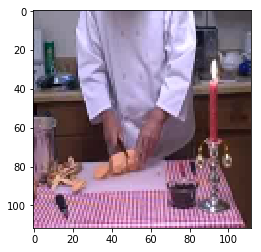

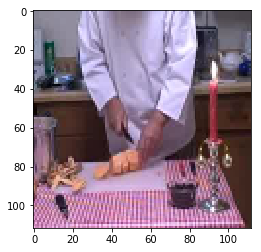

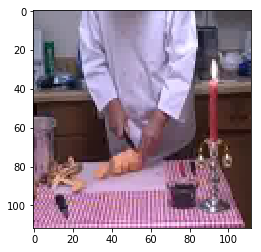

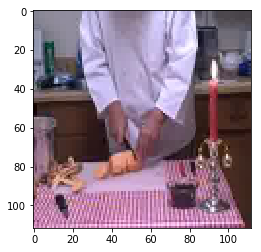

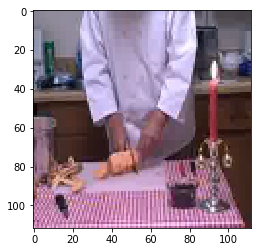

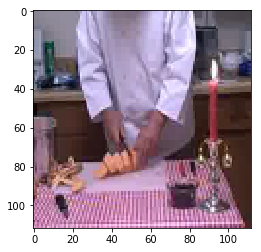

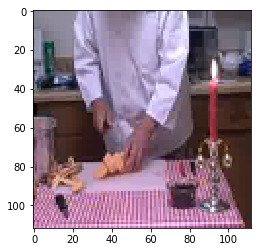

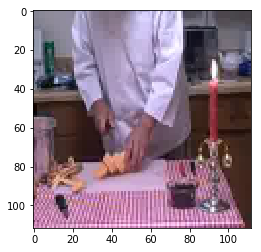

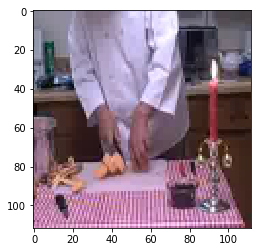

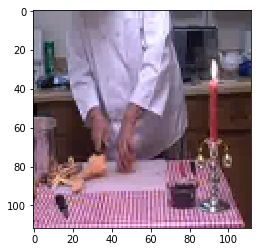

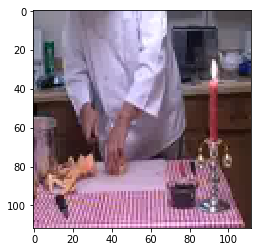

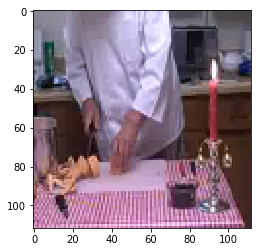

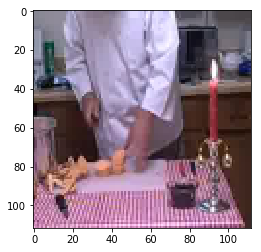

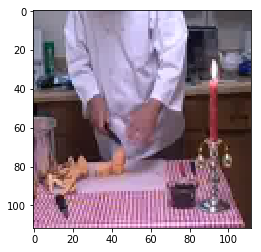

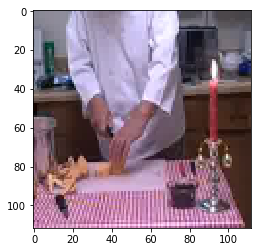

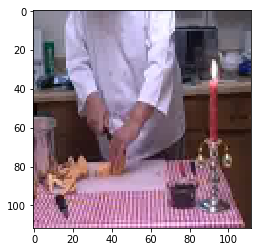

In [9]:
train_images, train_labels, next_batch_start, _=ucf.read_vid_and_label('UCF101_data_preparation/train.list',10,next_batch_start,16,112,normalisation=True)
lsp.view_video_seq(train_images,train_labels,16,item_num)

In [10]:
print(train_images.shape)
print(train_labels)

(10, 16, 112, 112, 3)
[24 24 24 24 24 24 24 24 24 24]


In [11]:
print(train_images.shape)
print(train_labels.shape)
print(next_batch_start)

(10, 16, 112, 112, 3)
(10,)
2529


#### Code snipsets Testing

In [12]:
import time
filename='UCF101_data_preparation/train.list'
lines = open(filename,'r')
read_dirnames = []
data = []
label = []
batch_index = 0
next_batch_start = -1
lines = list(lines)
#print(lines.shape)


video_indices = list(range(100))
#print(video_indices)
random.seed(time.time())
random.shuffle(video_indices)
print(video_indices)

[20, 43, 4, 24, 76, 78, 87, 77, 92, 81, 17, 79, 28, 12, 93, 47, 57, 73, 25, 38, 72, 13, 5, 2, 90, 52, 84, 14, 45, 83, 68, 37, 36, 58, 54, 71, 56, 91, 97, 0, 65, 18, 29, 51, 15, 86, 74, 64, 67, 46, 75, 21, 39, 49, 1, 40, 62, 3, 69, 85, 70, 11, 32, 6, 98, 42, 8, 44, 41, 16, 10, 80, 48, 50, 7, 30, 27, 61, 95, 53, 34, 9, 31, 19, 35, 96, 22, 63, 88, 82, 59, 99, 23, 33, 60, 66, 89, 55, 94, 26]


In [13]:
import os
ret_arr = []
s_index = 0
for parent, dirnames, filenames in os.walk(filename):
    filenames = sorted(filenames)
    s_index = random.randint(0, len(filenames) - num_frames_per_clip)
    jump=math.floor((len(filenames)/num_frames_per_clip)-1)
    print('jump',jump,'toatl lenght of file',len(filenames))
    for i in range(0, jump,len(filenames)):
      print('loop',i)

In [14]:
s_index = random.randint(0, 100 - 10)
print(s_index)
for i in range (1,2,10):
    print (i)

37
1


In [15]:
video_indices = range(1320, len(lines))
print(video_indices)

range(1320, 9999)


In [16]:
temp=list(range(1,10))
print(temp)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


#### For OpenCv Basede dataset preparation 